In [27]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

array([[[255, 198, 149],
        [255, 198, 149],
        [255, 198, 149],
        ...,
        [251, 180, 106],
        [251, 180, 106],
        [250, 179, 105]],

       [[255, 198, 149],
        [255, 198, 149],
        [255, 198, 149],
        ...,
        [251, 180, 106],
        [251, 180, 106],
        [253, 182, 108]],

       [[255, 198, 149],
        [255, 198, 149],
        [255, 198, 149],
        ...,
        [251, 180, 106],
        [251, 180, 106],
        [254, 183, 109]],

       ...,

       [[  2,  19,   8],
        [  0,  18,   6],
        [  0,  16,   4],
        ...,
        [  5,  26,  18],
        [  0,  16,   9],
        [  5,  19,  13]],

       [[  0,  15,   4],
        [  2,  18,   7],
        [  2,  18,   7],
        ...,
        [  4,  25,  17],
        [  1,  17,  10],
        [  3,  17,  11]],

       [[  1,  15,   4],
        [  4,  18,   7],
        [  2,  18,   7],
        ...,
        [  4,  25,  17],
        [  1,  17,  10],
        [  3,  17,  11]]], dtype=uint8)
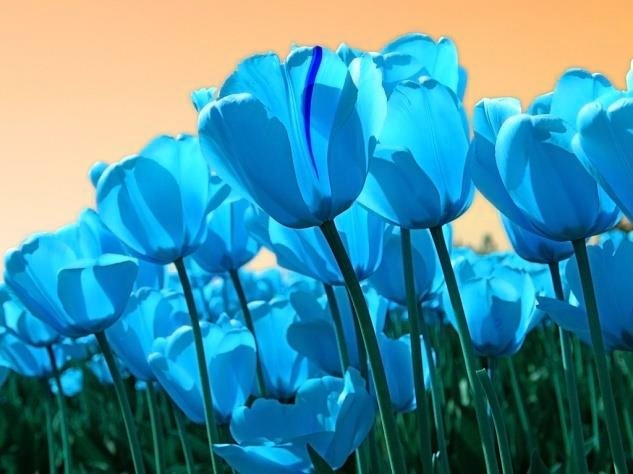

In [28]:
img = cv2.imread("Edge-Detection-Sample-Input-and-Output-Images.jpeg") #https://www.researchgate.net/figure/Edge-Detection-Sample-Input-and-Output-Images_fig5_327134322
img

array([[190, 190, 190, ..., 166, 166, 165],
       [190, 190, 190, ..., 166, 166, 168],
       [190, 190, 190, ..., 166, 166, 169],
       ...,
       [ 14,  12,  11, ...,  21,  12,  16],
       [ 10,  13,  13, ...,  20,  13,  14],
       [ 10,  13,  13, ...,  20,  13,  14]], dtype=uint8)
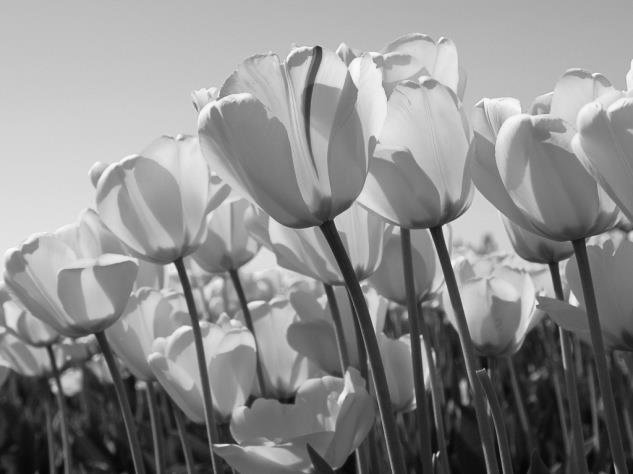

In [29]:
grayScale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grayScale

In [30]:
kernel_x= np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])
kernel_x

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [31]:
kernel_y= np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]])
kernel_y

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [32]:
def convolution(image, kernel):
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
    output = np.zeros(image.shape)
    for y in range(image_row-kernel_row):
        for x in range(image_col-kernel_col):
            output[y,x] = (kernel*image[y:y+kernel_row, x:x+kernel_col]).sum()
    return output


In [33]:
x=convolution(grayScale, kernel_x)
y=convolution(grayScale, kernel_y)

In [34]:
final_img= np.sqrt(x**2+y**2)

(np.float64(-0.5), np.float64(632.5), np.float64(473.5), np.float64(-0.5))

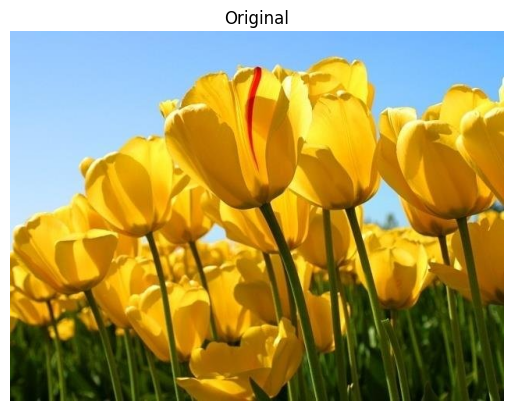

In [35]:
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(632.5), np.float64(473.5), np.float64(-0.5))

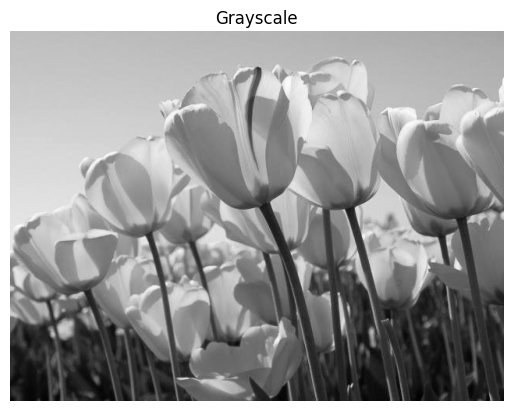

In [36]:
plt.title('Grayscale')
plt.imshow(grayScale, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(632.5), np.float64(473.5), np.float64(-0.5))

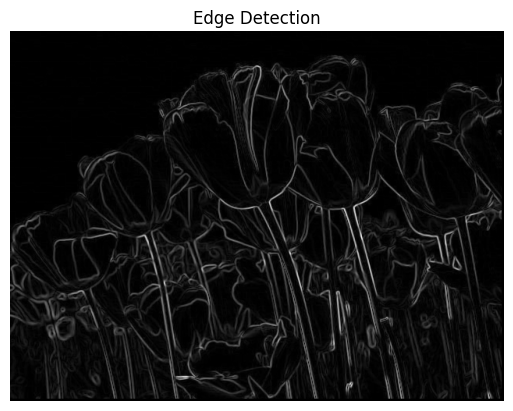

In [37]:
plt.title('Edge Detection')
plt.imshow(final_img, cmap='gray')
plt.axis('off')